<a href="https://colab.research.google.com/github/Afrinnn123/CVPR/blob/main/Final/Task_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

import os
import numpy as np
import matplotlib.pyplot as plt

In [10]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [11]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [12]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [13]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(32,32,3)),

    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()
RMSpropmodel = keras.Sequential([
    keras.Input(shape=(32, 32, 3)),
    layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])
RMSpropmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [14]:

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
h = model.fit(x=X_train, y=Y_train, epochs=13, validation_split=0.3, batch_size=256)

Epoch 1/13
137/137 [==============================] - 67s 477ms/step - loss: 1.8465 - accuracy: 0.3099 - val_loss: 1.5479 - val_accuracy: 0.4365
Epoch 2/13
137/137 [==============================] - 58s 426ms/step - loss: 1.4973 - accuracy: 0.4551 - val_loss: 1.3574 - val_accuracy: 0.5154
Epoch 3/13
137/137 [==============================] - 58s 425ms/step - loss: 1.3674 - accuracy: 0.5081 - val_loss: 1.2741 - val_accuracy: 0.5433
Epoch 4/13
137/137 [==============================] - 62s 456ms/step - loss: 1.2655 - accuracy: 0.5452 - val_loss: 1.1940 - val_accuracy: 0.5707
Epoch 5/13
137/137 [==============================] - 57s 419ms/step - loss: 1.1851 - accuracy: 0.5787 - val_loss: 1.1090 - val_accuracy: 0.6054
Epoch 6/13
137/137 [==============================] - 65s 476ms/step - loss: 1.1119 - accuracy: 0.6072 - val_loss: 1.0455 - val_accuracy: 0.6327
Epoch 7/13
137/137 [==============================] - 65s 475ms/step - loss: 1.0401 - accuracy: 0.6310 - val_loss: 1.0669 - val_ac

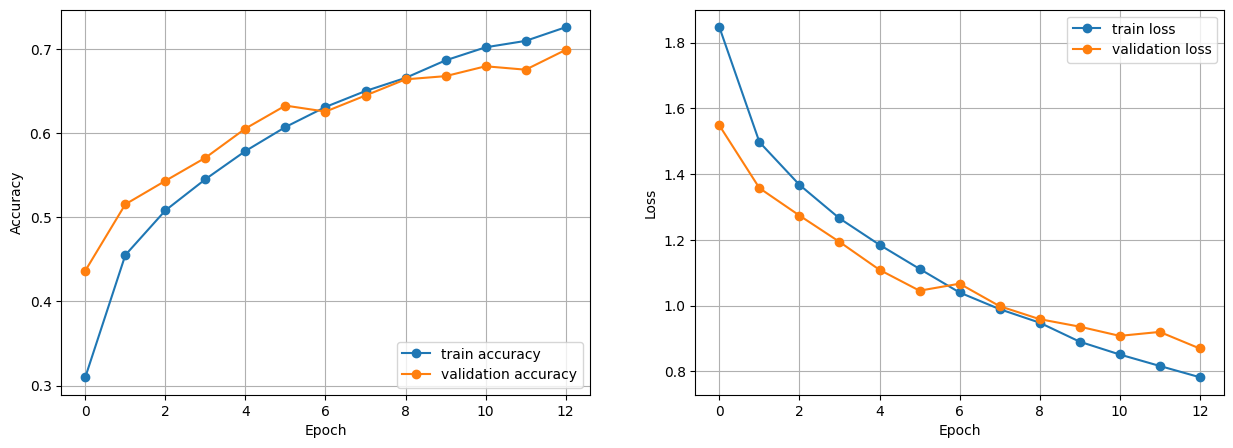

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [17]:
RMSpropmodel.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [18]:
RMSproph = RMSpropmodel.fit(x=X_train, y=Y_train, epochs=13, validation_split=0.3, batch_size=256)

Epoch 1/13
137/137 [==============================] - 59s 420ms/step - loss: 2.0940 - accuracy: 0.2291 - val_loss: 1.8487 - val_accuracy: 0.3511
Epoch 2/13
137/137 [==============================] - 55s 399ms/step - loss: 1.8033 - accuracy: 0.3440 - val_loss: 1.6564 - val_accuracy: 0.3995
Epoch 3/13
137/137 [==============================] - 57s 416ms/step - loss: 1.6559 - accuracy: 0.4020 - val_loss: 1.4659 - val_accuracy: 0.4697
Epoch 4/13
137/137 [==============================] - 56s 410ms/step - loss: 1.5510 - accuracy: 0.4417 - val_loss: 1.4260 - val_accuracy: 0.4919
Epoch 5/13
137/137 [==============================] - 56s 412ms/step - loss: 1.4707 - accuracy: 0.4716 - val_loss: 1.3800 - val_accuracy: 0.5088
Epoch 6/13
137/137 [==============================] - 53s 385ms/step - loss: 1.3996 - accuracy: 0.4988 - val_loss: 1.3285 - val_accuracy: 0.5303
Epoch 7/13
137/137 [==============================] - 52s 378ms/step - loss: 1.3377 - accuracy: 0.5242 - val_loss: 1.3629 - val_ac

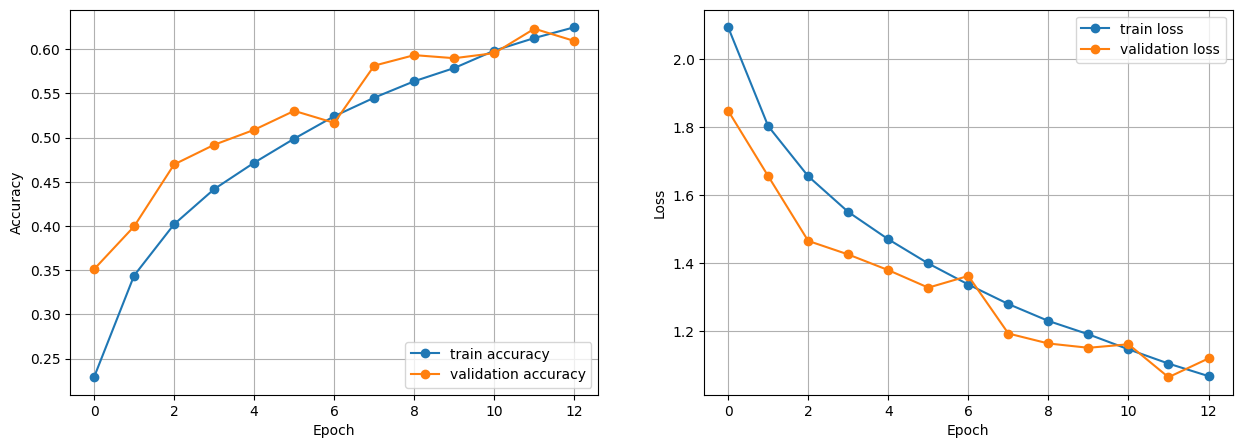

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(RMSproph.history['accuracy'], 'o-', label='train accuracy')
plt.plot(RMSproph.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(RMSproph.history['loss'], 'o-', label='train loss')
plt.plot(RMSproph.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()